# AERQ Profit & Loss
 

## ToDos
- [ ] skip empty lines while reading excel (for instance: secureguard sheet)

In [1]:
# define relevant packages; among others: JIRA API
import pandas as pd
import numpy as np 
from jira import JIRA 
import matplotlib.pyplot as plt


In [18]:
#read the several sheets from base excel file
df_tickets = pd.read_excel('./AERQ.commercials.overview.xlsx', sheet_name='Tickets', usecols="A:O", header=2)
df_procon = pd.read_excel('./AERQ.commercials.overview.xlsx', sheet_name='Procon LTE Data')


In [19]:
# hey, what's the shape of my matrix (and is it valid); should be bigger than (97, 15)
df_tickets.shape

(97, 15)

In [20]:
# show the topmost rows
df_tickets.head()

,Ticket,Title,Topic/Description,Billing cycle,Year,Delivery date,BC PI,Estimation,Total,Invoice number,Profile,Price p. profile,Fee type,Price estimated,Price billed
0,BCAERQ-1,AERQ | Set up of a BoardConnect Enterpise Linu...,Above specified hardware and shipment to HAM\t,April,2020.0,April,NaN,NaN,1.0,NaN,NaN,NaN,one-time,0.0,100.830
1,BCAERQ-1,AERQ | Set up of a BoardConnect Enterpise Linu...,Efforts for the initial set up,April,2020.0,April,NaN,NaN,6.0,NaN,Senior IT- Berater Typ A (FRA),119.31,one-time,0.0,715.860
2,BCAERQ-1,AERQ | Set up of a BoardConnect Enterpise Linu...,Azure Cloud Services,April,2020.0,April,NaN,NaN,1.0,NaN,NaN,NaN,monthly,0.0,210.565
3,BCAERQ-1,AERQ | Set up of a BoardConnect Enterpise Linu...,Cloud maintenance,April,2020.0,April,NaN,NaN,1.0,NaN,Senior IT- Berater Typ A (FRA),119.31,monthly,0.0,119.310
4,BCAERQ-1,AERQ | Set up of a BoardConnect Enterpise Linu...,Azure Cloud Services,May,2020.0,May,NaN,NaN,1.0,NaN,NaN,NaN,monthly,0.0,421.130


In [21]:
#some general variables and value preparations

#create categorical object which helps to order DataFrames by month later on
df_tickets['Billing cycle'] = pd.Categorical(df_tickets['Billing cycle'], categories=["Januar", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)

df_tickets = df_tickets.rename(str.lower, axis='columns', errors="raise")
df_tickets = df_tickets.rename(columns={'billing cycle': 'billing_cycle',
    'topic/description': 'description', 'delivery date': 'delivery_date',
    'bc pi': 'bc_pi', 'invoice number': 'invoice_number',
    'price p. profile': 'profile_price', 'fee type': 'fee_type',
    'price estimated': 'price_estimated', 'price billed': 'price_billed'}, errors="raise")
df_tickets.columns

Index(['ticket', 'title', 'description', 'billing_cycle', 'year',
       'delivery_date', 'bc_pi', 'estimation', 'total', 'invoice_number',
       'profile', 'profile_price', 'fee_type', 'price_estimated',
       'price_billed'],
      dtype='object')

## First, some QA

In [22]:
# let's inspect and clean the most used/relevant columns
df_tickets.billing_cycle.value_counts().sort_index()

Januar        0
February      6
March        10
April         4
May           5
June          3
July          7
August        6
September     4
October       6
November     15
December     10
Name: billing_cycle, dtype: int64

In [24]:
df_tickets.year.value_counts().sort_index()

2020.0    60
2021.0    33
Name: year, dtype: int64

In [26]:
df_tickets.profile_price.value_counts().sort_index()

55.44      1
56.70      6
71.19      1
119.31    52
139.68    21
230.00     1
Name: profile_price, dtype: int64

In [27]:
#df_tickets.loc[df_tickets.price_billed == "", 'price_billed'] = np.nan
price_recalculated = df_tickets.price_billed / df_tickets.total
price_recalculated.value_counts().sort_index()

55.440      1
56.700      2
56.700      2
71.190      1
100.830     1
119.310     3
119.310    36
139.680    20
210.565     1
230.000     1
421.130     8
dtype: int64

## Billings per month in 2020

No handles with labels found to put in legend.


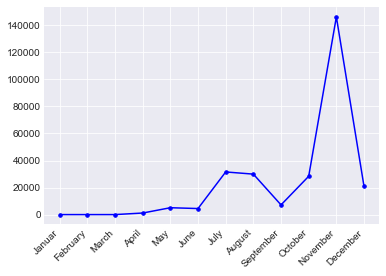

In [29]:
df_2020 = df_tickets.year == 2020
#df_tickets.loc[df_2020, :].groupby(by=['billing_cycle'])[['price_billed']].sum()
plt.style.use('seaborn-darkgrid')
plt.legend(loc='center right')
plt.plot(df_tickets.loc[df_2020, :].groupby(by=['billing_cycle'])[['price_billed']].sum(), c='b', marker = '.', markersize=7)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

## Billings per month in 2021

No handles with labels found to put in legend.


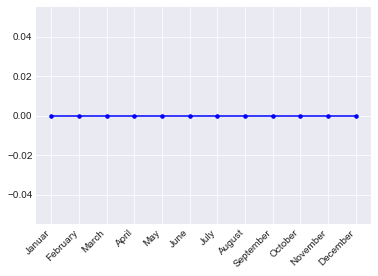

In [30]:
df_2021 = df_tickets.year == 2021
plt.style.use('seaborn-darkgrid')
plt.legend(loc='center right')
plt.plot(df_tickets.loc[df_2021, :].groupby(by=['billing_cycle'])[['price_billed']].sum(), c='b', marker = '.', markersize=7)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

## Process and plot ticket related data (so, the "Income")


### Ticket-based income per month (Budget = Letter Agreement)

In [12]:
#show the monthly income using the 'groupby' function and then apply sum() as an aggregation
#group by billing cycle (thus, month) and year, then create sum on column 'Price billed' and sort by month ascending
df_t2020 = df_tickets.groupby(by=['Billing cycle', 'Year'])[['Price billed']].sum().sort_values(by=['Billing cycle'])
df_t2020

Price billed
Billing cycle Year                
Januar        2020.0         0.000
              2021.0         0.000
February      2020.0         0.000
              2021.0         0.000
March         2020.0         0.000
              2021.0         0.000
April         2020.0      1146.565
              2021.0         0.000
May           2020.0      5074.220
              2021.0         0.000
June          2021.0         0.000
              2020.0      4466.030
July          2020.0     31543.924
              2021.0         0.000
August        2020.0     29939.600
              2021.0         0.000
September     2020.0      7166.510
              2021.0         0.000
October       2020.0     28339.670
              2021.0         0.000
November      2020.0    146268.065
              2021.0         0.000
December      2020.0     20796.950
              2021.0         0.000

<AxesSubplot:xlabel='Billing cycle,Year'>

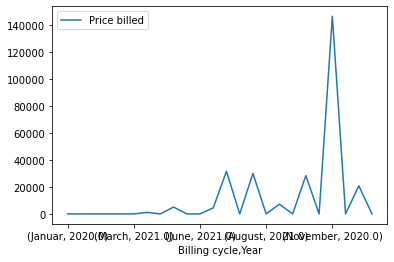

In [13]:
df_t2020.plot()

## Process and plot expenses 



### Expenses for SecureGuard in 2020


In [ ]:
df_secureguard = pd.read_excel('./AERQ.commercials.overview.xlsx', sheet_name='SecureGuard', usecols="A:F")

In [ ]:
df_secureguard['Month'] = pd.Categorical(df_secureguard['Month'], categories=["Januar", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)

#the rate LSY pays to SG
sg_rate = 127
#the rate LSY pays for internal employees
lsy_rate = 60

In [14]:
#group by month and year, then create sum on column 'Hours booked' and sort by month ascending
df_sg2020 = df_secureguard.groupby(by=['Month', 'Year'])[['Hours booked']].sum().sort_values(by=['Month'])
#calculate the price, derived from the 'Hours booked' and the current SG rate
df_sg2020 = df_sg2020 * sg_rate
#rename the column in the DataFrame, so that it makes sense again
df_sg2020 = df_sg2020.rename(columns = {'Hours booked': 'Kosten €'})
#print out the DF
df_sg2020

Kosten €
Month     Year            
Januar    2020.0      0.00
          2021.0      0.00
February  2020.0      0.00
          2021.0      0.00
March     2020.0      0.00
          2021.0      0.00
April     2020.0      0.00
          2021.0      0.00
May       2020.0      0.00
          2021.0      0.00
June      2021.0      0.00
          2020.0    508.00
July      2020.0   5397.50
          2021.0      0.00
August    2020.0   9461.50
          2021.0      0.00
September 2020.0  26352.50
          2021.0      0.00
October   2020.0  33972.50
          2021.0      0.00
November  2020.0  46323.25
          2021.0      0.00
December  2020.0      0.00
          2021.0      0.00

In [15]:
df_sg2020.groupby(by='Year')[['Kosten €']].sum()

,Kosten €
Year,
2020.0,122015.25
2021.0,0.00


<AxesSubplot:xlabel='Month,Year'>

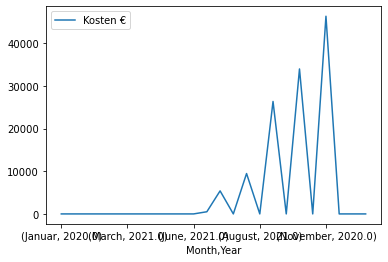

In [16]:
df_sg2020.plot()

## Tools

### Fill in commercial data to BCAERQ tickets

In [35]:
trackSpace = 'https://trackspace.lhsystems.com'
bcUser = 'u293733'
bcPw = '(Uw^lLG>^gl8'

In [39]:
df_ticket = df_tickets.ticket == 'BCAERQ-146'
commercials_headline = '|| Description || no. of units || no. of units || Total price for SR (actual) || \\\n '
commercials = ''
commercials_row = ''
price = 0.00


In [40]:
commercials = commercials_headline
for row in df_tickets.loc[df_ticket, :].itertuples():
    print(type(row.profile_price))
    commercials_row =  '| ' + row.description  + ' | ' + str(row.estimation) + ' | ' + str("{:.2f}".format(row.profile_price)) + ' | ' + str("{:.2f}".format(row.price_estimated)) + ' | \\\n '
    price += row.price_estimated
    commercials += commercials_row
commercials += ' | | | TOTAL | ' + str("{:.2f}".format(price)) + ' | '
print(commercials)


<class 'float'>
<class 'float'>
|| Description || no. of units || no. of units || Total price for SR (actual) || \
 | BC-CORE-C general enhancements & maintenance  | 24.0 | 56.70 | 1360.80 | \
 | BC-CORE-V general enhancements & maintenance  | 24.0 | 56.70 | 1360.80 | \
  | | | TOTAL | 2721.60 | 


In [41]:
try:
    jiraBc = JIRA(server=trackSpace, basic_auth=(bcUser, bcPw))    # a username/password tuple
    #create lists from found issues to later convert those to a DataFrame    
    jiraBc.add_comment('BCAERQ-146',commercials)
except Exception as e:
    print(e)